In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('Data/train.xlsx')
data = data.dropna() # drop rows with missing values, since they are few

# Generating a heatmap for the correlation matrix 
-  the feature with highest correlation with price range is ram (0.92)
-  there is a hight correlation (0.64) between primary camera (pc) and front camera (fc) which is logical since they are usually upgraded together by the manufacturer
- there is a high correlation (0.51) between px_width and px_height as they relate to pixel dimensions and screen resolution
- There is a high correlation (0.58) between 3G and 4G, as 4G is just an upgraded version of 3G, so they are realted 

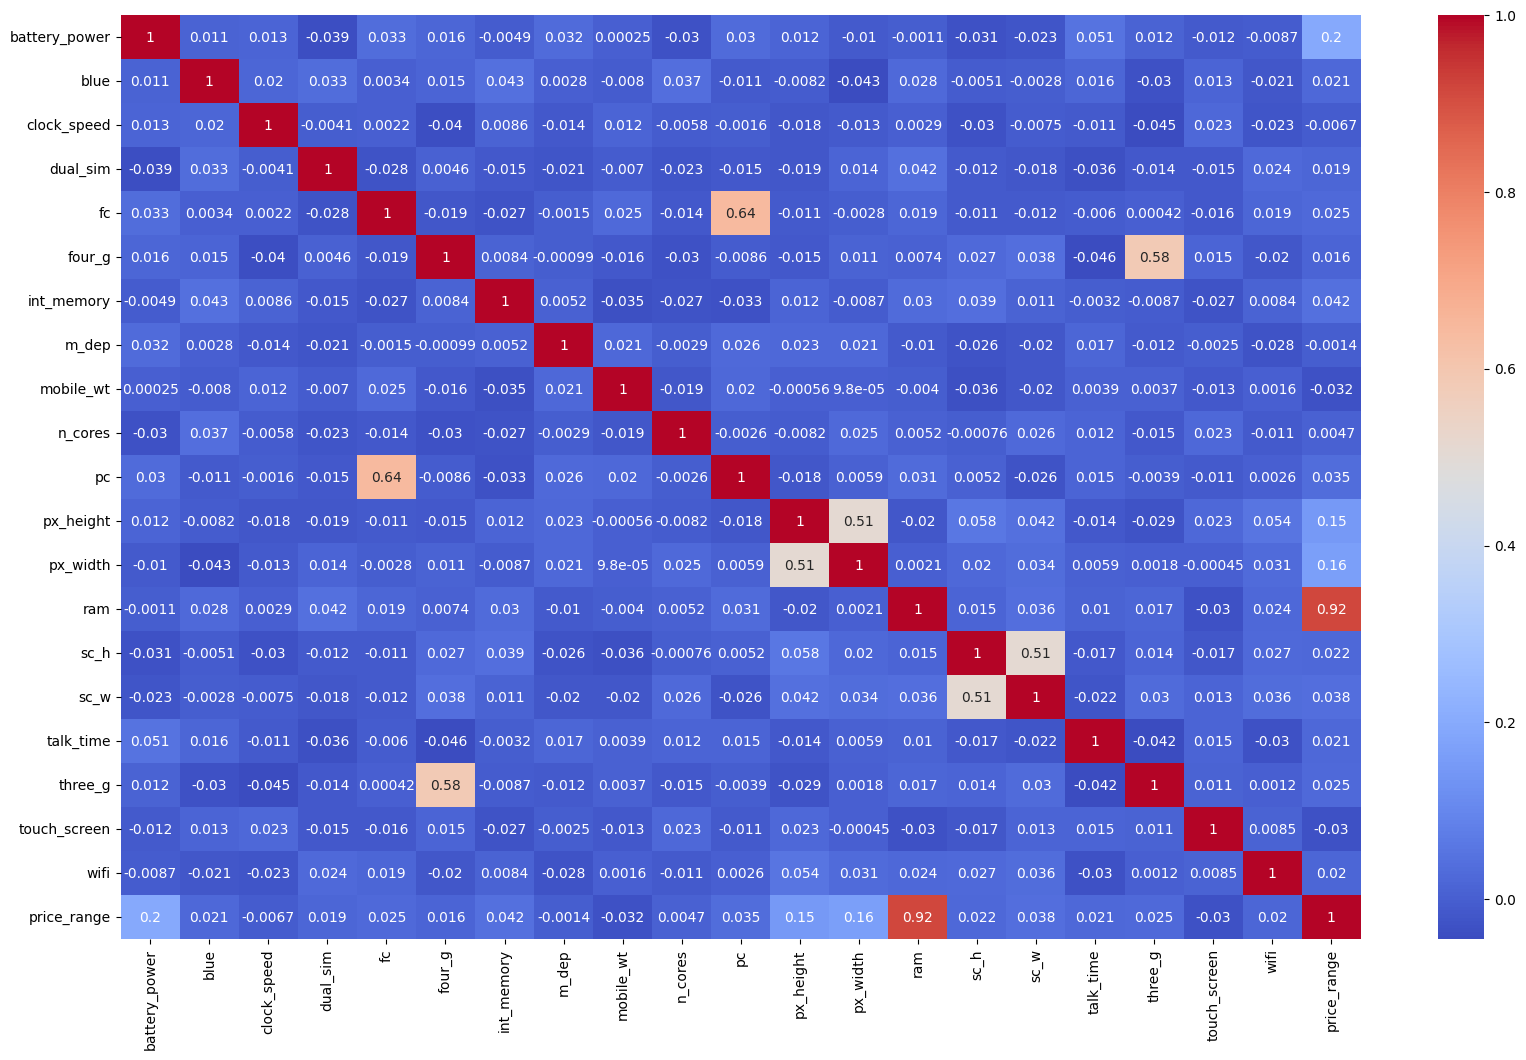

In [24]:
# heatmap of correlation matrix to identify the most important features
corr = data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Distribution of each feature through histograms 
- There is some skewness in fc and px_height


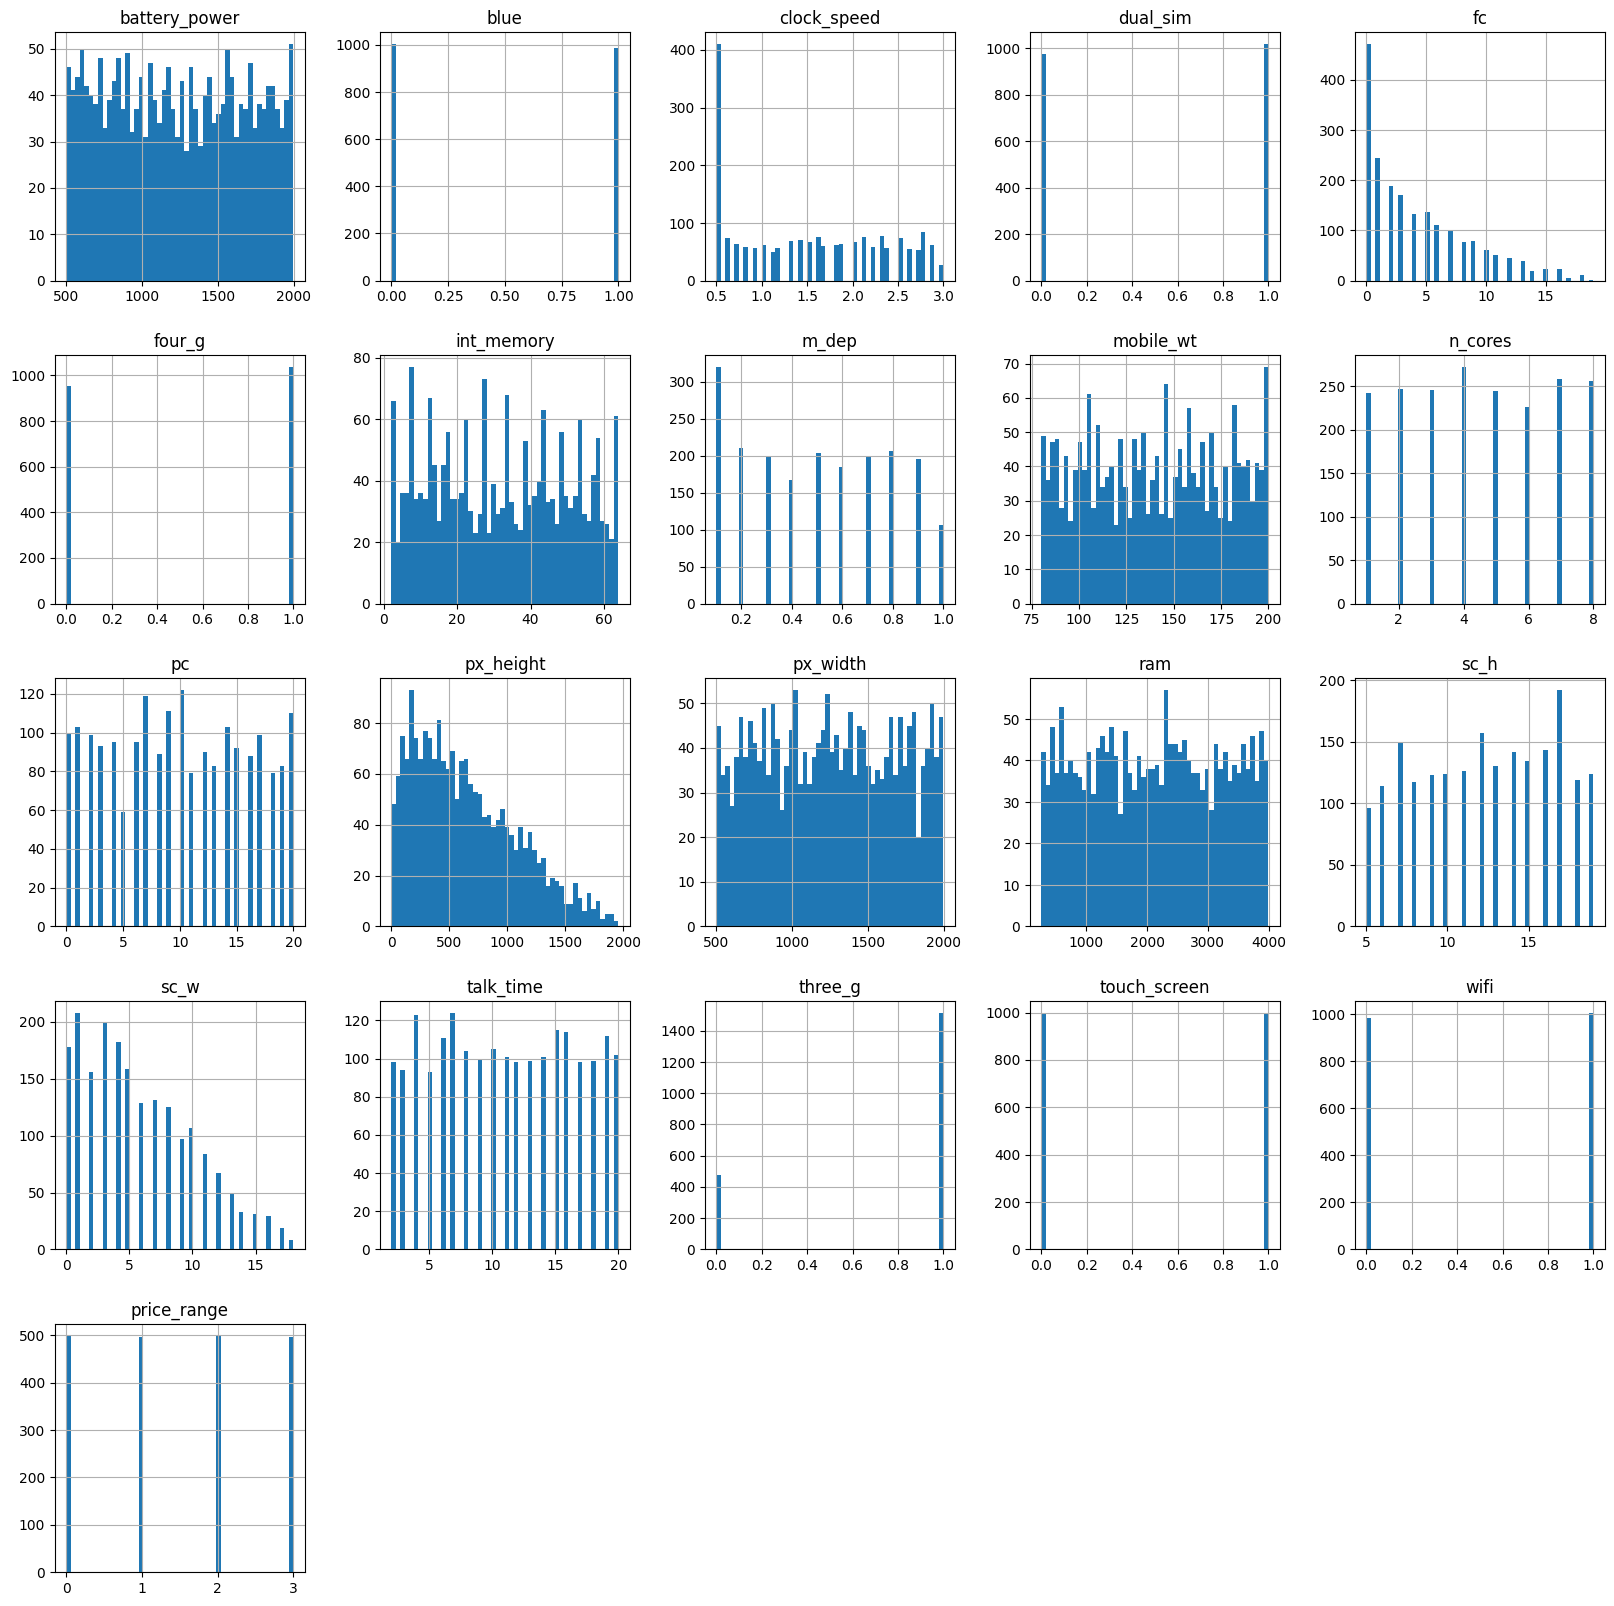

In [17]:
# histogram of all features
data.hist(bins= 50, figsize=(20,20))
plt.show()


# Checking for outliers in data through box plots

- There are very few outliers, which are only present in fc, px_height, and three_g
- As some manufucterers use high resolution front cameras as their selling point
- There are only few devices that have no 3G nowadays


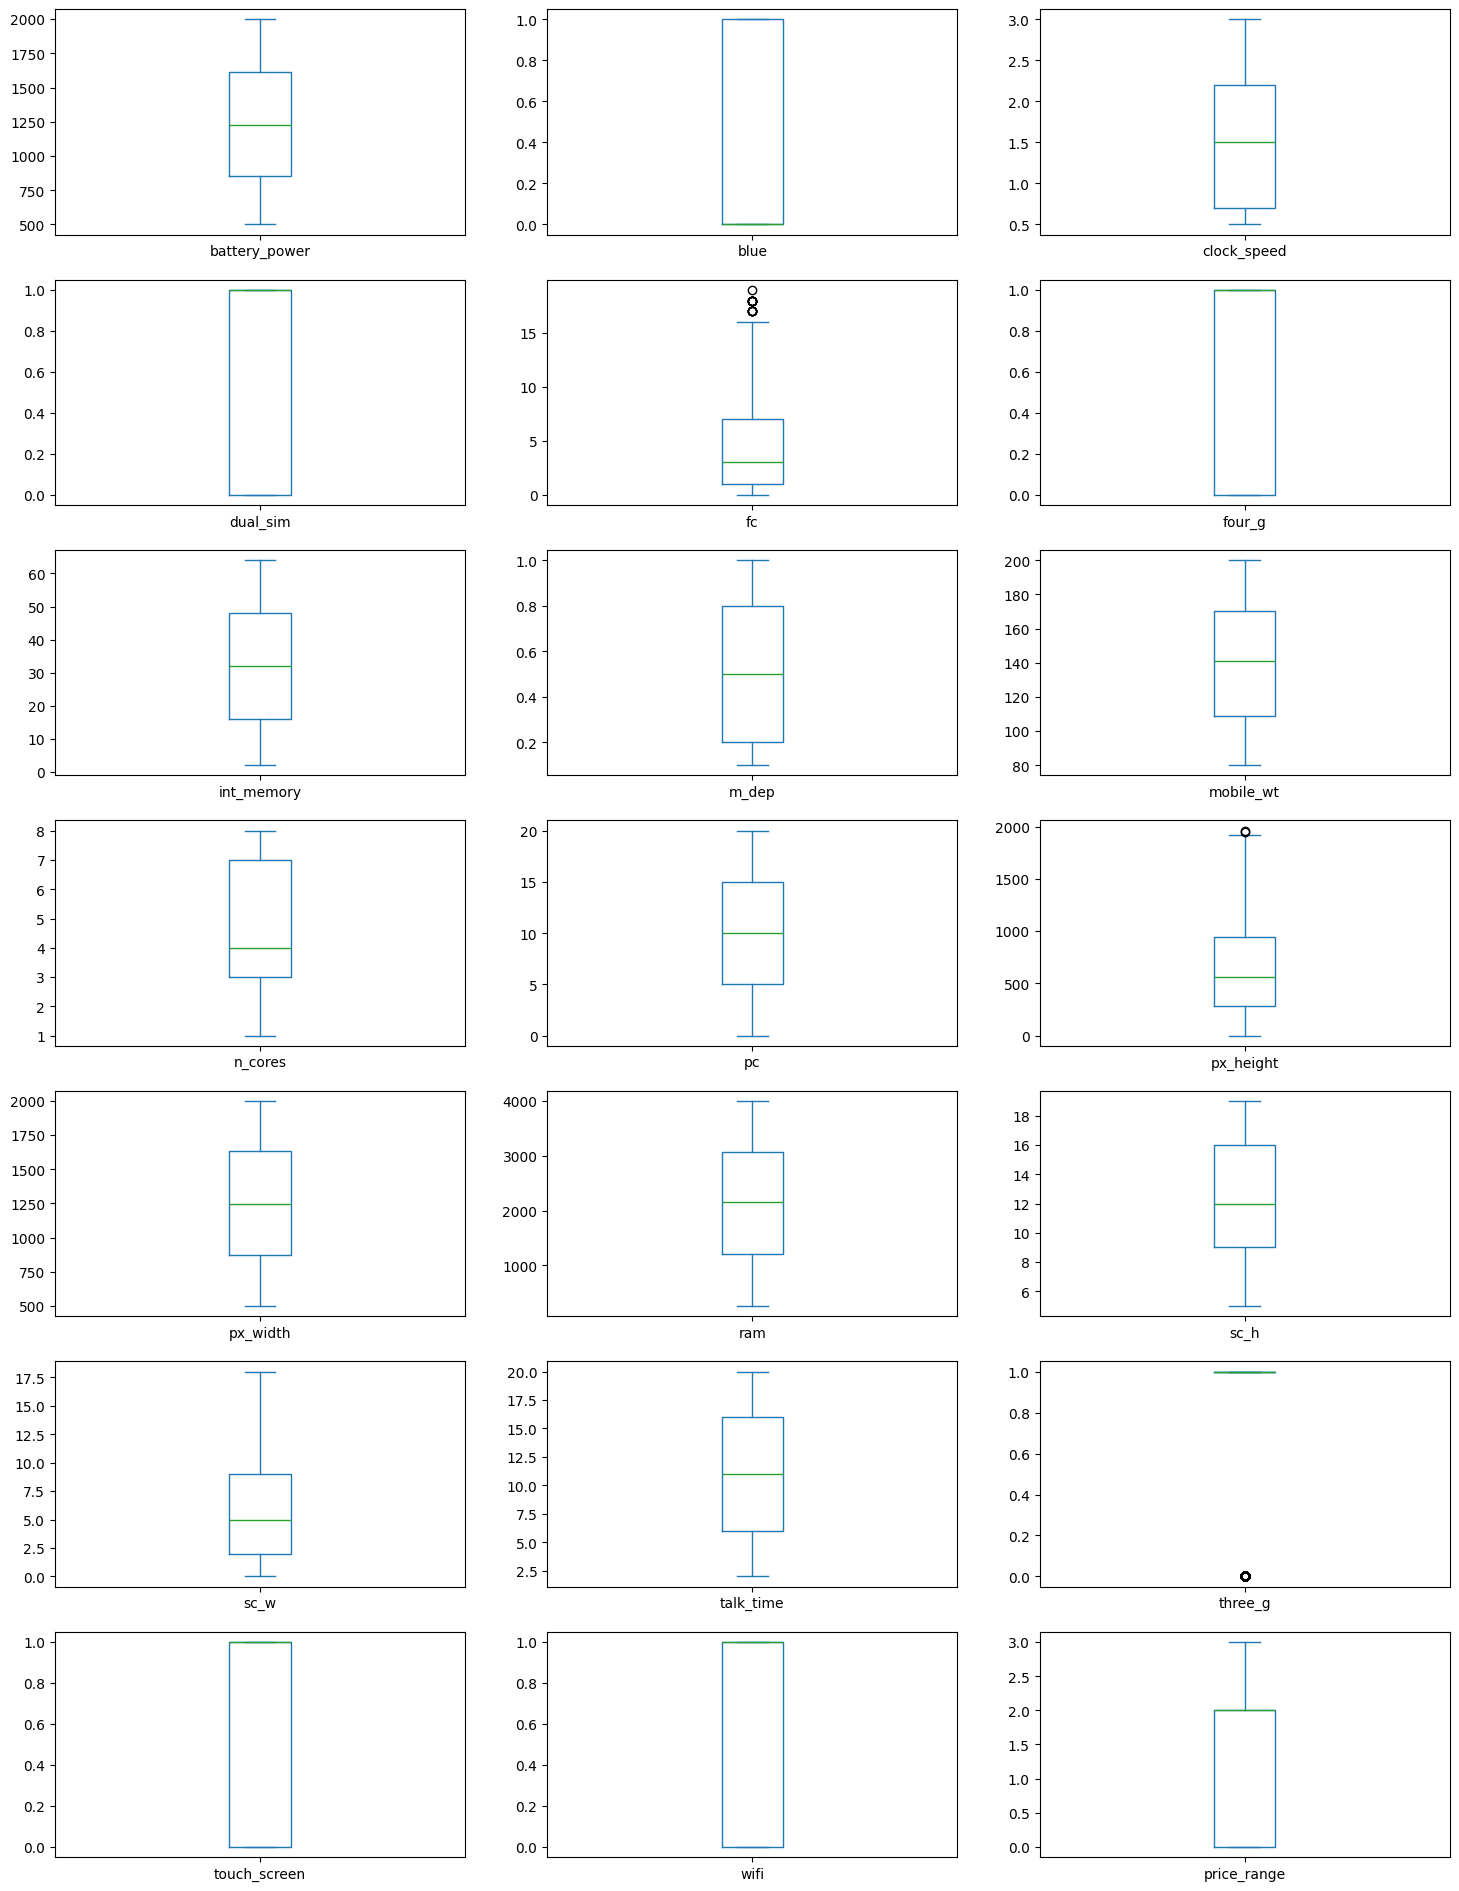

In [5]:
data.plot(kind = "box", subplots = True, layout = (7, 3),figsize= (18,24), sharex = False, sharey = False)
plt.show()

To anaylze the relation between 3G and 4G features, it was found that all the devices that contain 4G, usually contains 3G as well, but not all devices that contains 3G, has 4G

In [9]:
pd.crosstab(data['four_g'], data['three_g'])

three_g,0,1
four_g,,
0.0,476,478
1.0,0,1037


# Price range vs ram
- it was clear through this graph, that as ram size increases, prices increases as well, and that clarifies the high
correlation between the ram and price_range features outputed from the correaltion matrix

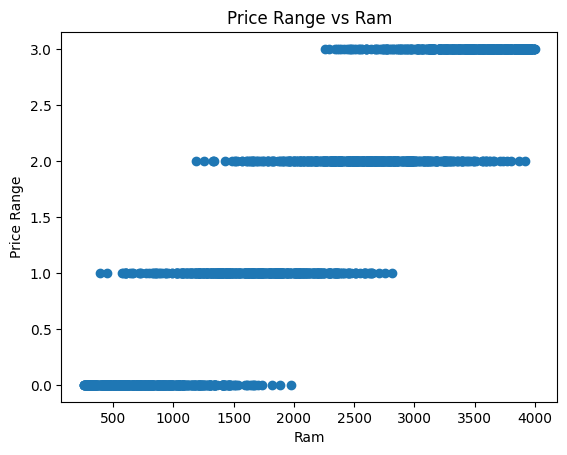

In [10]:
plt.scatter(data = data, y="price_range", x="ram")
plt.xlabel("Ram")
plt.ylabel("Price Range")
plt.title("Price Range vs Ram")
plt.show()

# Battery power vs ram, and its affect on price
- By increasing ram, battery power decreases and price increases as well, as there where a negative correlation between
battery power and ram , and positve correlation between ram and price range
- since there is also a positive correlation between battery power and price, battery power decreases as ram increases, so that price be more reasonable and not too high, as both battery power and ram increases price_range

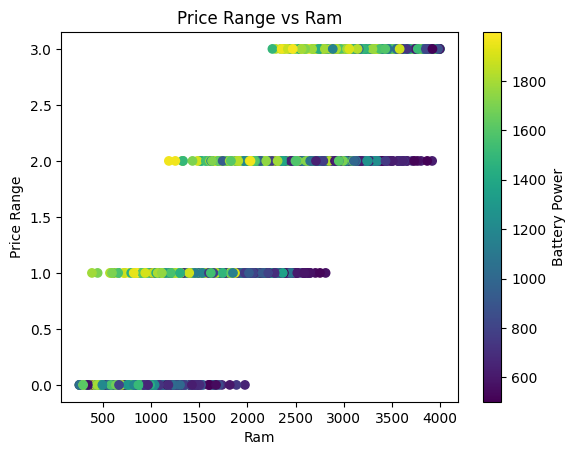

In [23]:
# plot price_range vs ram, battery_power as color
plt.scatter(data = data, y="price_range", x="ram", c="battery_power")
plt.colorbar(label='Battery Power')
plt.xlabel("Ram")
plt.ylabel("Price Range")
plt.title("Price Range vs Ram")
plt.show()


# pixel ratio and observing its relation with price_range


- It was found that devices that have pixel ratio above 300 have a price range below 2 

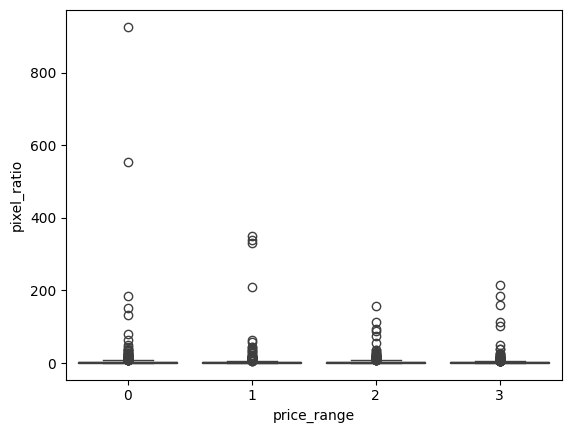

In [28]:
data['pixel_ratio'] = data['px_width']/data['px_height']
sns.boxplot(x='price_range', y='pixel_ratio', data=data)
plt.show()
